**The objective of this question is to analyze tipping behavior using the tips dataset from the Seaborn library.**

**(a)** Implement a function that generates a bar plot with error bars to visualize the average total bill amount for each day of the week, including the 95% confidence intervals.

In [1]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

C:\Users\hp\AppData\Local\Temp\ipykernel_7584\807077609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_frame.groupby('day')['total_bill'].agg(['mean', 'count', 'std']).reset_index()


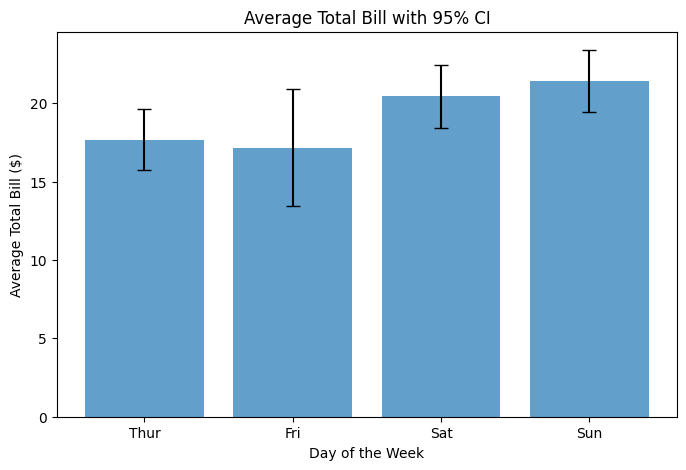

In [2]:
def plot_total_bill_with_ci(data_frame):
    grouped_data = data_frame.groupby('day')['total_bill'].agg(['mean', 'count', 'std']).reset_index()

    index = 0
    ci_values = []
    while index < len(grouped_data):
        ci = 1.96 * (grouped_data.loc[index, 'std'] / np.sqrt(grouped_data.loc[index, 'count']))
        ci_values.append(ci)
        index += 1

    plt.figure(figsize=(8, 5))
    plt.bar(grouped_data['day'], grouped_data['mean'], yerr=ci_values, capsize=5, alpha=0.7)
    plt.xlabel("Day of the Week")
    plt.ylabel("Average Total Bill ($)")
    plt.title("Average Total Bill with 95% CI")
    plt.show()

tips = sns.load_dataset('tips')
plot_total_bill_with_ci(tips)

**(b)** Implement a function that creates a scatter plot with a regression line and confidence interval to examine the relationship between total bill and tip amount.

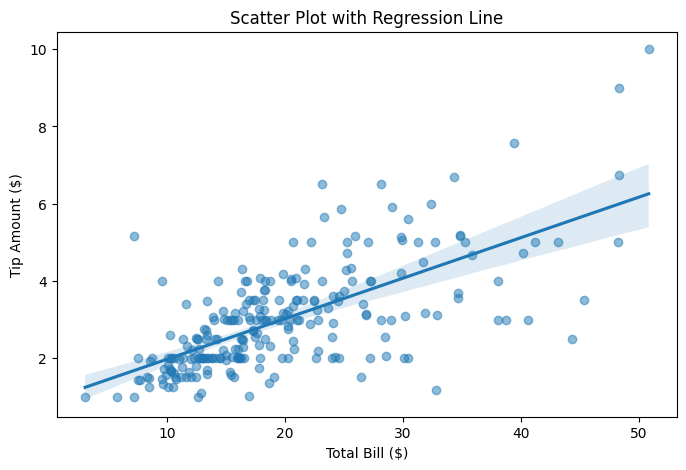

In [3]:
def plot_regression_total_bill_tip(data_frame):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=data_frame['total_bill'], y=data_frame['tip'], scatter_kws={'alpha':0.5})
    plt.xlabel("Total Bill ($)")
    plt.ylabel("Tip Amount ($)")
    plt.title("Scatter Plot with Regression Line")
    plt.show()

tips_info = sns.load_dataset('tips')
plot_regression_total_bill_tip(tips_info)

**(c)** Implement a function that creates a Q-Q plot to assess the normality of the tip distribution.

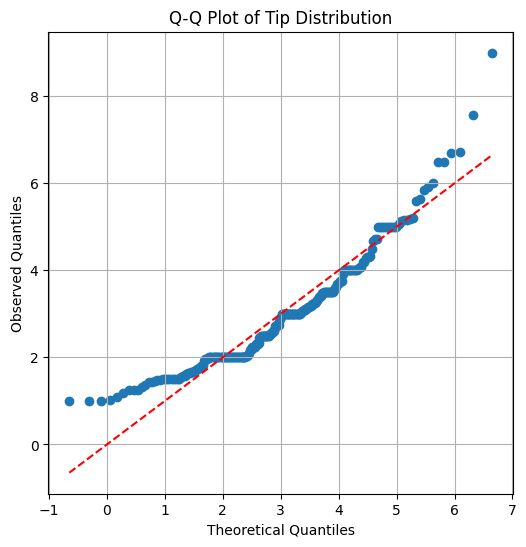

In [4]:
def plot_qq_tips(data_frame):
    tips_values = data_frame['tip'].values
    sorted_values = np.sort(tips_values)

    total_items = 0
    while total_items < len(sorted_values):
        total_items += 1

    theoretical_quants = np.linspace(0, 1, total_items)
    theoretical_values = stats.norm.ppf(theoretical_quants, np.mean(sorted_values), np.std(sorted_values))

    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_values, sorted_values)
    plt.plot(theoretical_values, theoretical_values, linestyle="dashed", color="red")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Observed Quantiles")
    plt.title("Q-Q Plot of Tip Distribution")
    plt.grid(True)
    plt.show()

tips_dataset = sns.load_dataset('tips')
plot_qq_tips(tips_dataset)